In [80]:
import random
import simpy
import matplotlib.pyplot as plt
import numpy as np

In [81]:
SEED = 9999
random.seed(SEED)

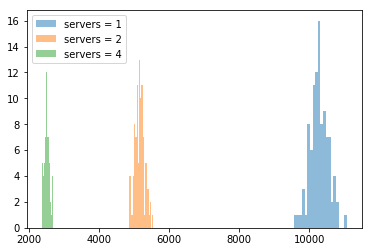

[10280.933184802863, 5163.766663016872, 2511.0152036969434]


In [115]:
class Source(object):
    ''' Generate the customers comming into the system with some exponetially distributed interval time.
    '''
    def __init__(self, env, numCustomers, interval, serveTime, server):
        self.env = env
        self.numCustomers = numCustomers
        self.interval = interval
        self.serveTime = serveTime
        self.server = server
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create n customers and timeout after each creation
        '''
        for i in range(1, self.numCustomers+1):
            customer = Customer(self.env, i, self.server, self.serveTime)
            timeUntillNext = random.expovariate(1. / self.interval)
            yield self.env.timeout(timeUntillNext)

class Customer(object):
    ''' Customers request the passed resource if they can make use of an open service.
        They are then served which takes some exponentially distributed time.
    '''
    def __init__(self, env, number, server, serveTime):
        self.env = env
        self.number = number
        self.server = server
        self.serveTime = serveTime
        self.action = env.process(self.run())
    
    def run(self):
        ''' Create a service request and use it once it becomes available
        '''
        arrival = self.env.now
#         print('customer %d starts at %d' % (self.number, self.env.now))
        with self.server.request() as req:
            yield req
            results.append(self.env.now-arrival)
#             print('customer %d served at %d' % (self.number, self.env.now))
            yield self.env.timeout(random.expovariate(1./self.serveTime))
#             print('customer %d done at %d' % (self.number, self.env.now))

customers = 1000
capacity = [1,2,4]
reps = 100
rho = 0.9
serviceTime = 10.0
arrival = 9.9
means = []
plt.figure()
for cap in capacity:
    totalResults = []
    arrival /= cap
    for _ in range(reps):
        results = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=cap)
        source = Source(env, customers, arrival, serviceTime, server)
        env.run()
        totalResults.append(env.now)
    means.append(np.mean(totalResults))
    plt.hist(totalResults, bins=20, alpha=0.5, label="servers = " + str(cap))
#     plt.plot([means[-1], means[-1]], [0, 50], scaley=False, linestyle="--", label="mean n=" + str(cap))
plt.legend()
plt.show()
print(means)

9.9 10.0 1
4.95 10.0 2
2.475 10.0 4


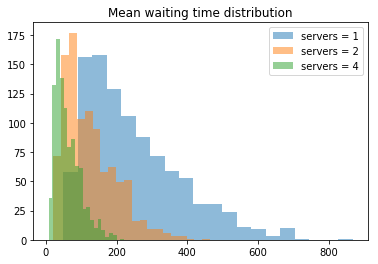

[247.0229234371569, 124.24927451660473, 61.578705503541535]


In [123]:
customers = 1000
capacity = [1,2,4]
reps = 1000
rho = 0.9
serviceTime = 10.0
arrival = 9.9
means = []
plt.figure()
for cap in capacity:
    totalResults = []
    newArrival = arrival/cap
    print(newArrival, serviceTime, cap)
    for _ in range(reps):
        results = []
        env = simpy.Environment()
        server = simpy.Resource(env, capacity=cap)
        source = Source(env, customers, newArrival, serviceTime, server)
        env.run()
        totalResults.append(np.mean(results))
    means.append(np.mean(totalResults))
    plt.hist(totalResults, bins=20, alpha=0.5, label="servers = " + str(cap))
#     plt.plot([means[-1], means[-1]], [0, 50], scaley=False, linestyle="--", label="mean n=" + str(cap))
plt.legend()
plt.title("Mean waiting time distribution")
plt.show()
print(means)